Here is the code for Problem 3, in this code, I have defined a class with the main functions (updating the weights and bias, train and predict) as my classifer. I used Softmax as the activation function and Categorical Cross Entropy Loss function. I have used 3-D matrix multiplication to achive gradients. You can see the results at the bottom.

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# data load
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [3]:
# data reshape and black and white
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.0

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.0

train_labels = (np.arange(np.max(train_labels_original) + 1) == train_labels_original[:, None]).astype(float)
test_labels = (np.arange(np.max(test_labels_original) + 1) == test_labels_original[:, None]).astype(float)

In [4]:
# initial variables
batch_size = 600
epochs = 20
learning_rate = 1
m = 10
data_size = train_images.shape[0]
dimension = train_images.shape[1]
digit_classifier = []
models_train_accuracy = []
models_test_accuracy = []
predicted_labels_train = np.zeros((1,train_labels_original.shape[0]))
predicted_labels_test = np.zeros((1,test_labels_original.shape[0]))

In [5]:
class softmax_classifier:
    
    def __init__(self, batch_size, dimension, m, learning_rate):
        self.weight = np.zeros((dimension, m))
        self.bias = np.zeros((m, 1))
        self.dimension = dimension
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_class = m
    
    def softmax(self, z):
        z = z - np.max(z, axis=0)
        s = np.exp(z)/np.sum(np.exp(z), axis=0)
        return s

    def backward(self, X, Y):
        z = np.dot(self.weight.T,X) + self.bias
        A = self.softmax(z)
        A = np.repeat(A[np.newaxis], self.num_class, axis = 0) - np.repeat(np.identity(self.num_class)[:,:, np.newaxis], self.batch_size, axis=2)
        YA = np.repeat(Y.T[:, np.newaxis], self.num_class, axis = 1) * A
        YA = np.sum(YA, axis=0)

        gradient_weight = 1.0/self.batch_size * np.dot(X, YA.T)
        gradient_bias = 1.0/self.batch_size * np.sum(YA, axis=1,keepdims=True)

        return gradient_weight, gradient_bias
    
    def update(self, X, Y):
        X = X.transpose()
        gradient_weight, gradient_bias = self.backward(X, Y)

        self.weight = self.weight - self.learning_rate * gradient_weight
        self.bias = self.bias - self.learning_rate * gradient_bias


    def predict (self, X):
        X = X.transpose()
        A = self.softmax(np.dot(self.weight.T, X) + self.bias)
        
        return A

In [6]:
# creating 10 classifiers
digit_classifier = softmax_classifier(batch_size, dimension, m, learning_rate)

In [7]:
# training classifiers
for epoch in range(epochs):
        Y_train_dic = []
        Y_test_dic = []
        shuffled_indices = np.random.permutation(data_size)
        train_images_shuffled = train_images[shuffled_indices]
        train_labels_shuffled = train_labels[shuffled_indices]

        for i in range(0, data_size, batch_size):
                xi = train_images_shuffled[i : i + batch_size]
                yi = train_labels_shuffled[i : i + batch_size]
                digit_classifier.update(xi,yi)
        
        predicted_labels_train = np.squeeze(np.argmax(digit_classifier.predict(train_images), axis = 0))
        predicted_labels_test = np.squeeze(np.argmax(digit_classifier.predict(test_images), axis = 0))

        train_accuracy = np.mean([int(i==j) for i, j in zip(predicted_labels_train, train_labels_original)]) * 100.0
        models_train_accuracy.append(train_accuracy)
        
        test_accuracy = np.mean([int(i==j) for i, j in zip(predicted_labels_test, test_labels_original)]) * 100.0
        models_test_accuracy.append(test_accuracy)

        print "epoch " + str(epoch) + " ====> train accuracy: {0:0.4f} ====> test accuracy: {1:0.4f}".format(train_accuracy, test_accuracy)

epoch 0 ====> train accuracy: 90.1750 ====> test accuracy: 90.8400
epoch 1 ====> train accuracy: 91.0717 ====> test accuracy: 91.6500
epoch 2 ====> train accuracy: 91.5033 ====> test accuracy: 91.6400
epoch 3 ====> train accuracy: 91.7600 ====> test accuracy: 91.9300
epoch 4 ====> train accuracy: 91.9600 ====> test accuracy: 91.8600
epoch 5 ====> train accuracy: 92.1450 ====> test accuracy: 92.2100
epoch 6 ====> train accuracy: 92.2450 ====> test accuracy: 92.1700
epoch 7 ====> train accuracy: 92.4000 ====> test accuracy: 92.1600
epoch 8 ====> train accuracy: 92.3433 ====> test accuracy: 92.2000
epoch 9 ====> train accuracy: 92.4417 ====> test accuracy: 92.1700
epoch 10 ====> train accuracy: 92.5933 ====> test accuracy: 92.3200
epoch 11 ====> train accuracy: 92.6217 ====> test accuracy: 92.4200
epoch 12 ====> train accuracy: 92.5933 ====> test accuracy: 92.1600
epoch 13 ====> train accuracy: 92.6467 ====> test accuracy: 92.2800
epoch 14 ====> train accuracy: 92.7850 ====> test accuracy

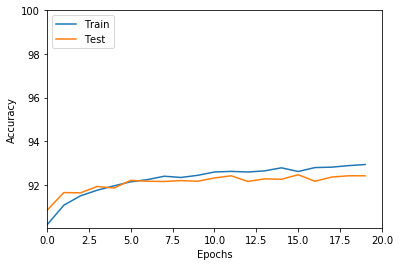

In [8]:
plt.plot(range(epochs), models_train_accuracy)
plt.plot(range(epochs), models_test_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(top = 100)
plt.xlim(0,20)
plt.show()